# Modeling One 

In [147]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [148]:
df_2004 = pd.read_csv('./csv_files/df_2004')
df_2008 = pd.read_csv('./csv_files/df_2008')
df_2012 = pd.read_csv('./csv_files/df_2012')
df_2016 = pd.read_csv('./csv_files/df_2016')

In [149]:
df_2008['previous_year_total'] = df_2004['total_vote_ratio']
df_2008['previous_year_dem'] = df_2004['dem_vote_ratio']
df_2008['previous_year_rep'] = df_2004['rep_vote_ratio']
df_2008['previous_year_dif'] = df_2004['vote_diff']

df_2012['previous_year_total'] = df_2008['total_vote_ratio']
df_2012['previous_year_dem'] = df_2008['dem_vote_ratio']
df_2012['previous_year_rep'] = df_2008['rep_vote_ratio']
df_2012['previous_year_dif'] = df_2008['vote_diff']


df_2016['previous_year_total'] = df_2012['total_vote_ratio']
df_2016['previous_year_dem'] = df_2012['dem_vote_ratio']
df_2016['previous_year_rep'] = df_2012['rep_vote_ratio']
df_2016['previous_year_dif'] = df_2012['vote_diff']

In [132]:
df_2008 = df_2008[['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff', 'previous_year_total', 'previous_year_dem', 'previous_year_rep', 'previous_year_dif']]
df_2012 = df_2012[['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff', 'previous_year_total', 'previous_year_dem', 'previous_year_rep', 'previous_year_dif']]
df_2016 = df_2016[['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff', 'previous_year_total', 'previous_year_dem', 'previous_year_rep', 'previous_year_dif']]

In [150]:
df_2008.head()

,oct_rate,nov_rate,density,total_vote_ratio,dem_vote_ratio,rep_vote_ratio,vote_diff,continuum_2003,influence_2003,per_less_high_2000,...,per_some_college_2000,per_bachelors_or_higher_2000,per_less_high_change,per_high_dimploma_change,per_some_college_change,per_bachelors_change,previous_year_total,previous_year_dem,previous_year_rep,previous_year_dif
0,8.8,8.9,0.019768,0.420639,0.178451,0.242188,-0.063738,6,6,29.9,...,21.4,12.8,-11.2,2.5,6.7,2.0,0.374462,0.167296,0.207166,-0.039870
1,4.5,4.5,0.010722,0.429616,0.114996,0.314620,-0.199624,4,5,35.3,...,17.2,9.4,-10.1,4.5,4.6,1.0,0.422471,0.150904,0.271567,-0.120663
2,4.7,5.2,0.013401,0.454519,0.223933,0.230586,-0.006653,7,9,32.1,...,20.3,13.5,-8.4,0.6,3.5,4.3,0.364665,0.151942,0.212724,-0.060782
3,5.7,6.6,0.002757,0.457119,0.214373,0.242746,-0.028373,2,2,9.2,...,36.5,31.2,-3.6,-2.9,0.2,6.3,0.454130,0.173859,0.280271,-0.106412
4,3.3,3.6,0.073487,0.513618,0.247838,0.265780,-0.017942,8,7,12.2,...,28.2,11.2,-10.3,3.0,6.0,1.4,0.526998,0.228582,0.298416,-0.069834


In [172]:
# possible targets ['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff']
def linear_model(df, target):
    X = df.drop(['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff'], axis=1)
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    print('R^2 on test', cross_val_score(lm, X_test, y_test, cv=5).mean())
    
    predictions = lm.predict(X_test)
    
    print('mean squared error', np.sqrt(mean_squared_error(y_test, predictions)))
    
    if target == 'total_vote_ratio':
        color = 'rebeccapurple'
    elif target == 'dem_vote_ratio':
        color = 'cornflowerblue'
    elif target == 'rep_vote_ratio':
        color = 'firebrick'
    else:
        color = 'forestgreen'
    
    plt.scatter(y_test, predictions, alpha=.1, color=color)
    plt.title('Predictions versus Actual');
    plt.show()
    
    residuals = y_test - lm.predict(X_test)
    
    plt.scatter(y_test, residuals, alpha=.1, color=color)
    plt.title('Residuals');
    plt.show()
    
    plt.hist(residuals, bins=25, color=color)
    plt.title("Histogram of Residuals");
    
    columns = []
    for x in X.columns:
        columns.append(x)
    
    feature_importance = pd.DataFrame()
    feature_importance['feature_name'] = columns
    feature_importance['coefficients'] = lm.coef_

    
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    plt.xlim(-0.2, 0.2)

    people = feature_importance['feature_name']
    y_pos = np.arange(len(people))
    performance = feature_importance['coefficients']


    ax.barh(y_pos, performance, align='center', color=color)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(people)
    ax.invert_yaxis() 
    plt.title('Feature Importance')
    plt.show()

# 2004

R^2 on test 0.504639526432
mean squared error 0.0561145906989


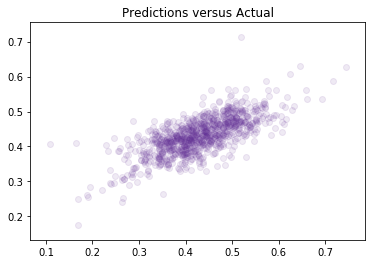

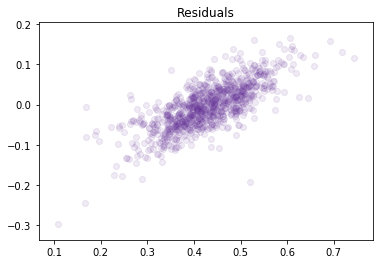

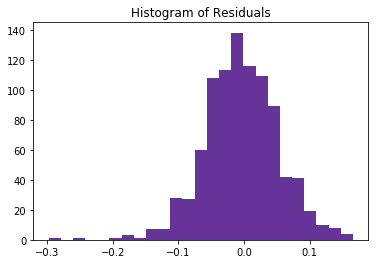

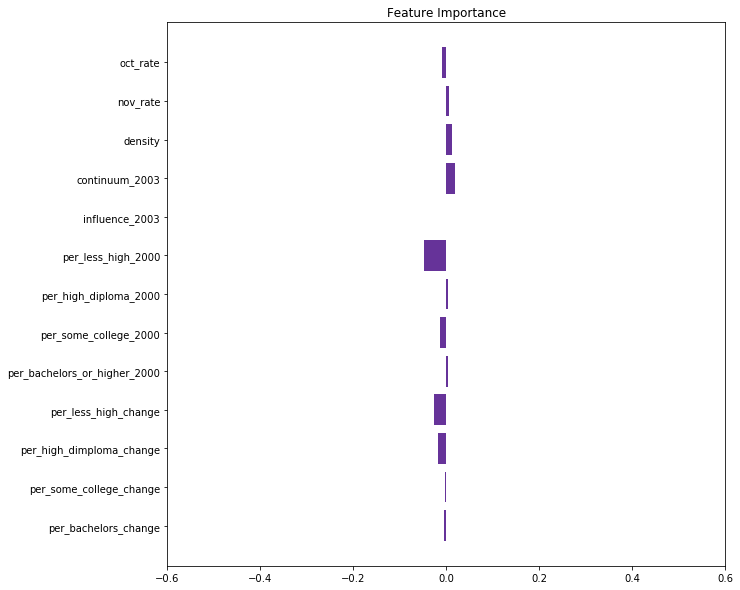

In [156]:
linear_model(df_2004, 'total_vote_ratio')

R^2 on test 0.214436344516
mean squared error 0.0565073056018


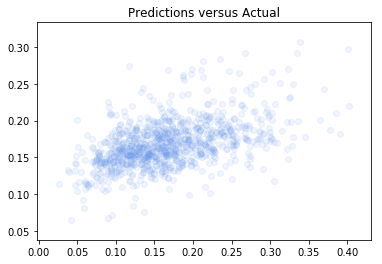

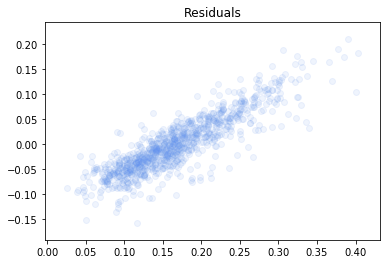

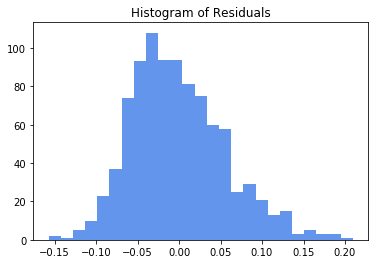

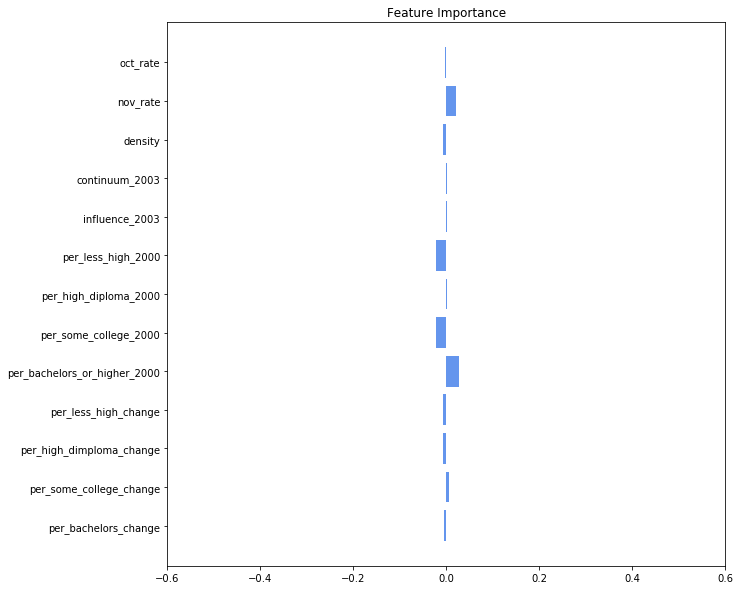

In [157]:
linear_model(df_2004, 'dem_vote_ratio')

R^2 on test 0.490937453442
mean squared error 0.0516876401953


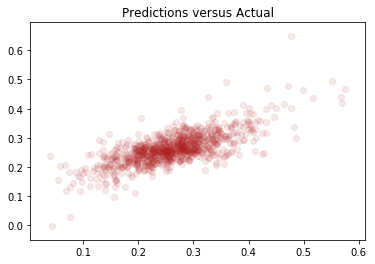

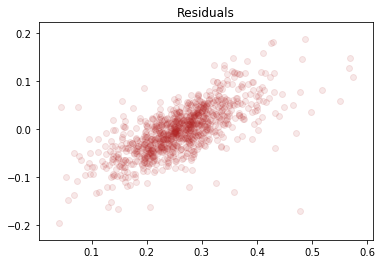

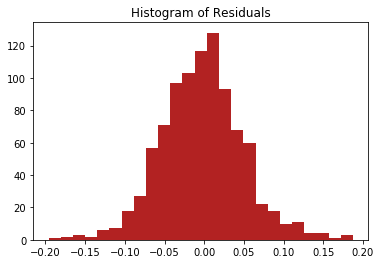

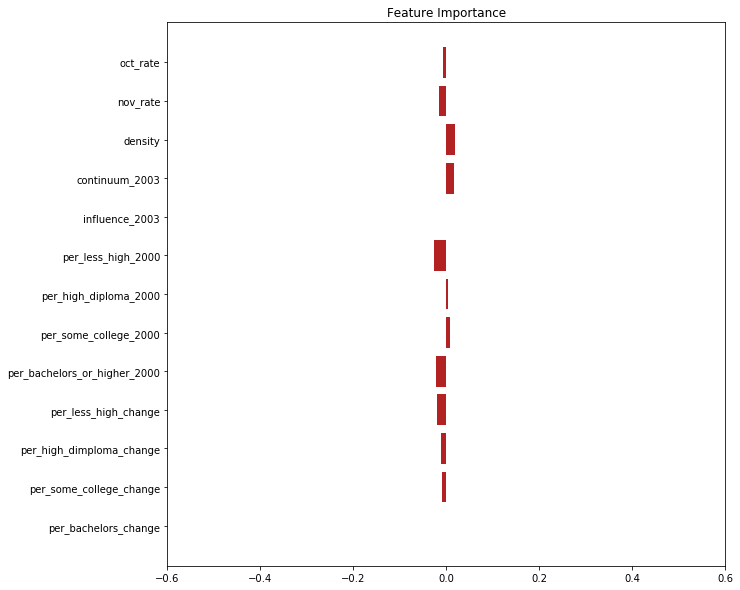

In [158]:
linear_model(df_2004, 'rep_vote_ratio')

R^2 on test 0.304937806213
mean squared error 0.0926311404516


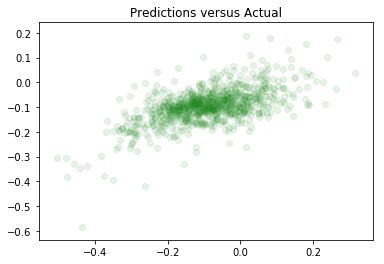

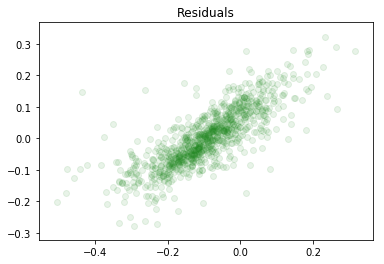

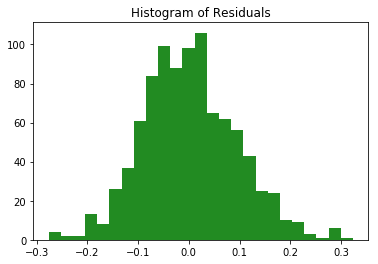

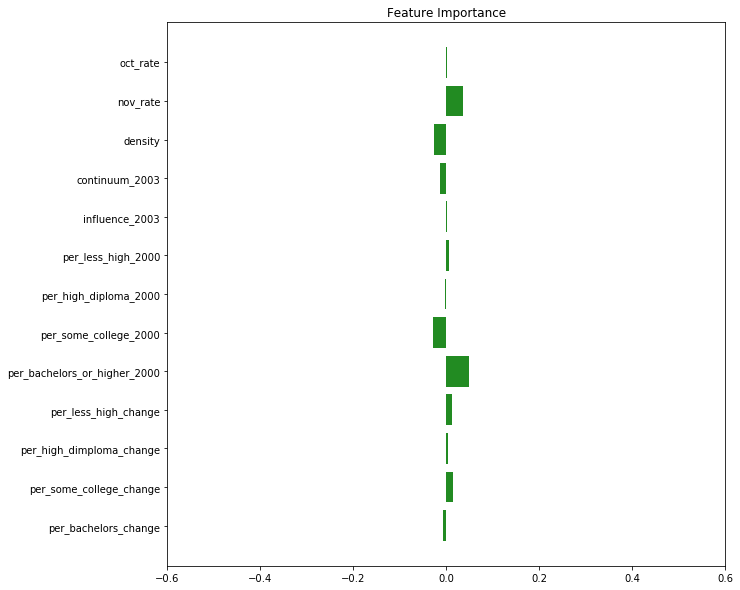

In [159]:
linear_model(df_2004, 'vote_diff')

# 2008

R^2 on test 0.815177404958
mean squared error 0.0329011602453


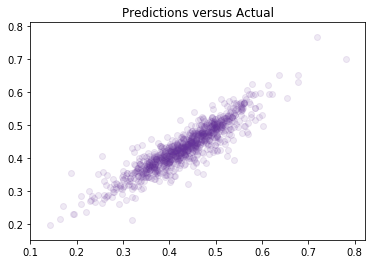

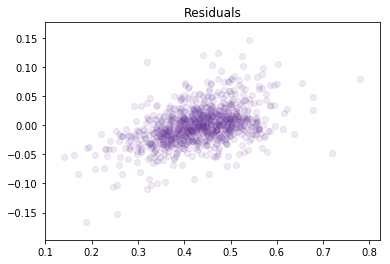

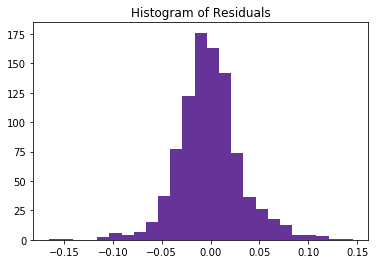

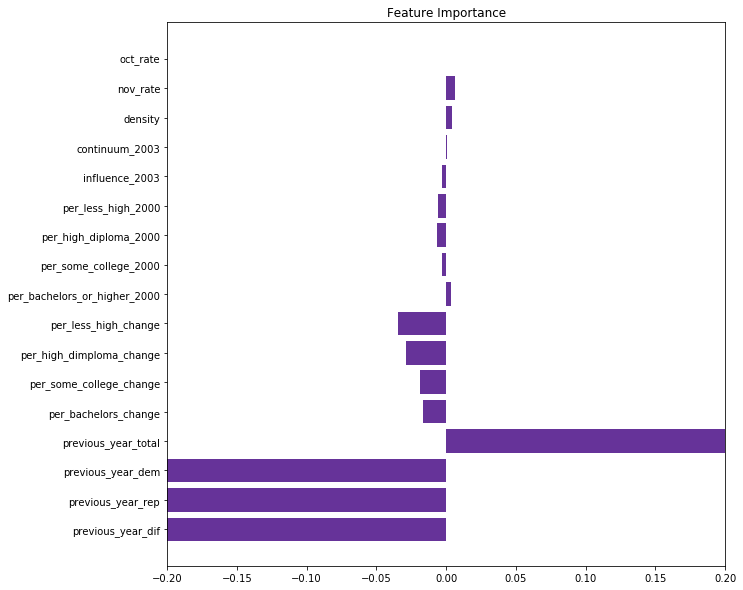

In [173]:
linear_model(df_2008, 'total_vote_ratio')

R^2 on test 0.862364440182
mean squared error 0.026949806067


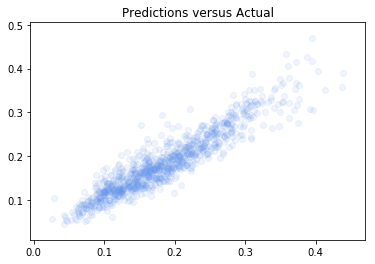

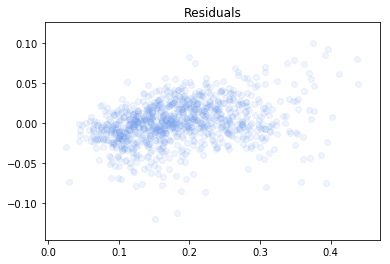

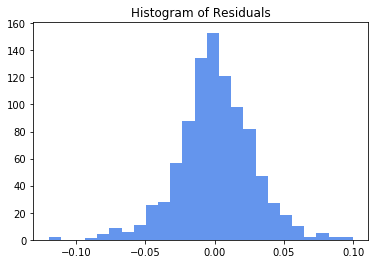

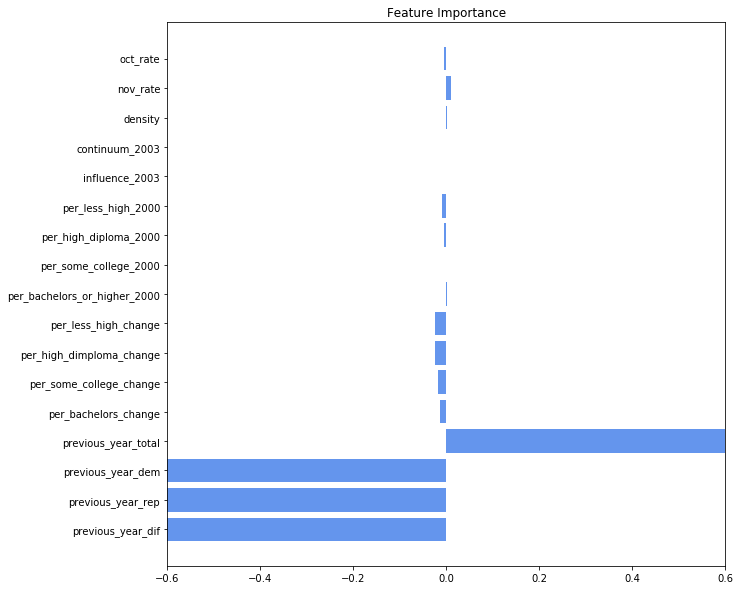

In [160]:
linear_model(df_2008, 'dem_vote_ratio')

R^2 on test 0.884785306913
mean squared error 0.0233389855128


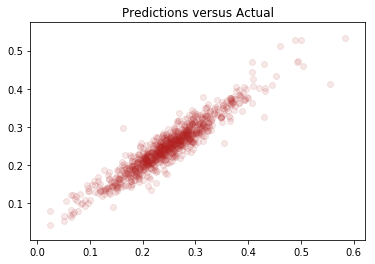

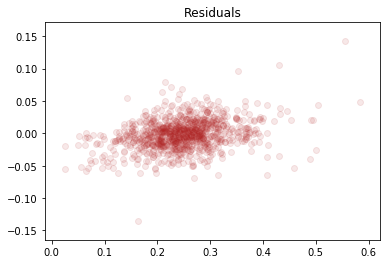

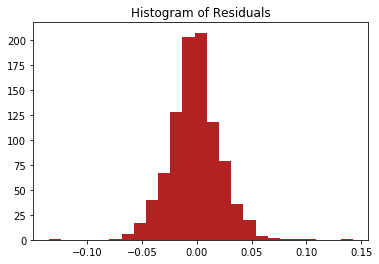

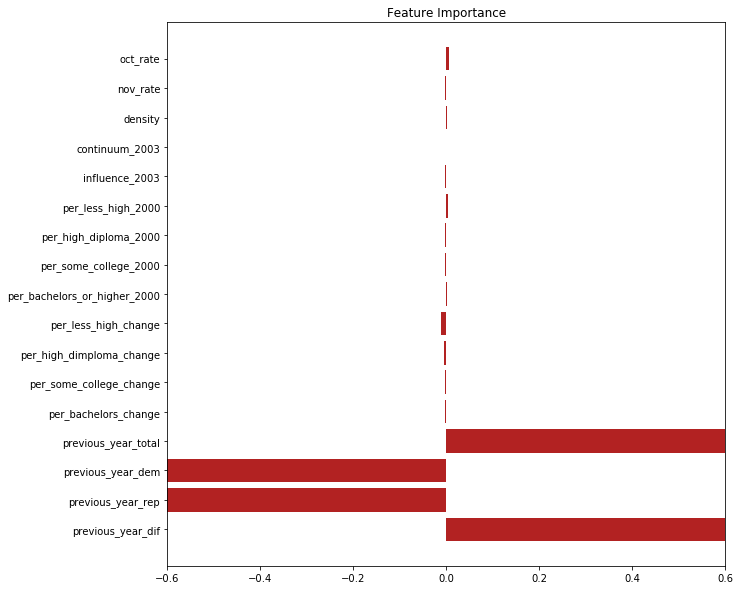

In [161]:
linear_model(df_2008, 'rep_vote_ratio')

R^2 on test 0.897263427416
mean squared error 0.0382406112071


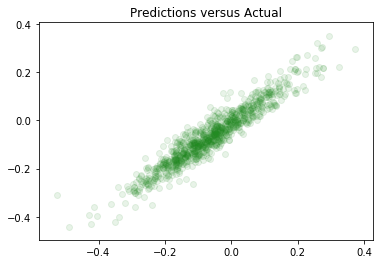

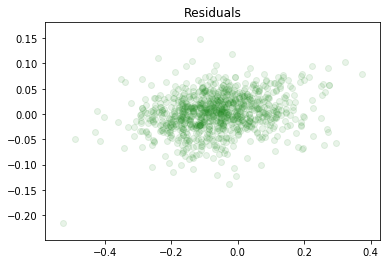

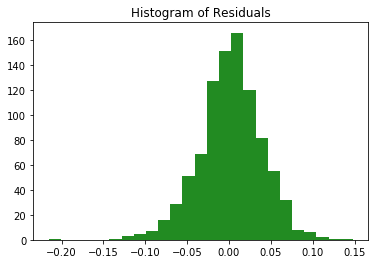

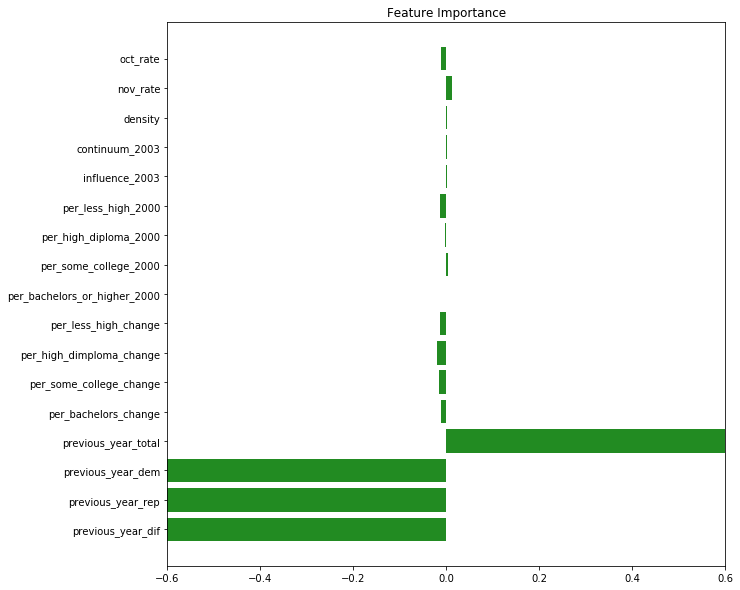

In [162]:
linear_model(df_2008, 'vote_diff')

# 2012

R^2 on test 0.901058391172
mean squared error 0.0262723292305


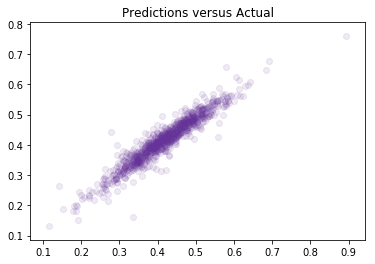

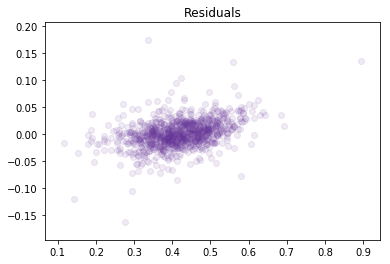

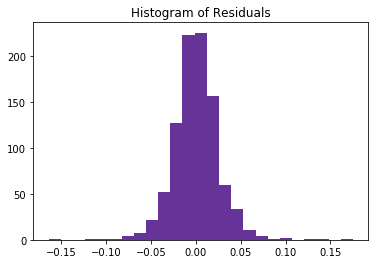

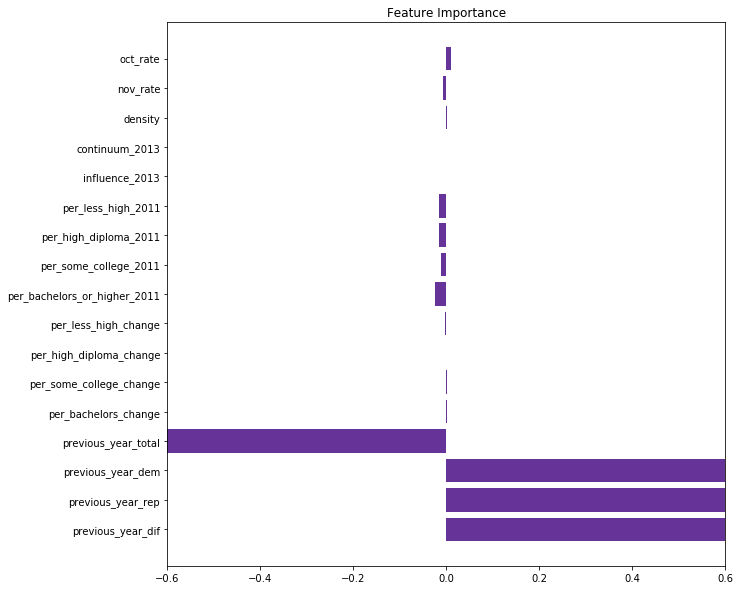

In [163]:
linear_model(df_2012, 'total_vote_ratio')

R^2 on test 0.944699051328
mean squared error 0.0177555070144


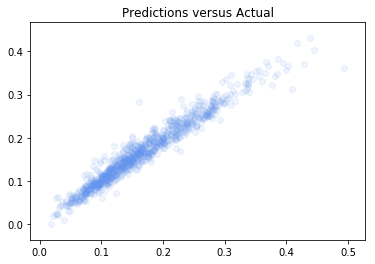

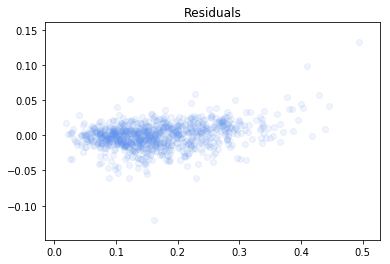

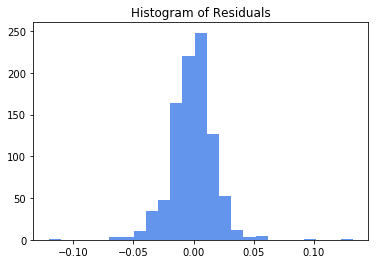

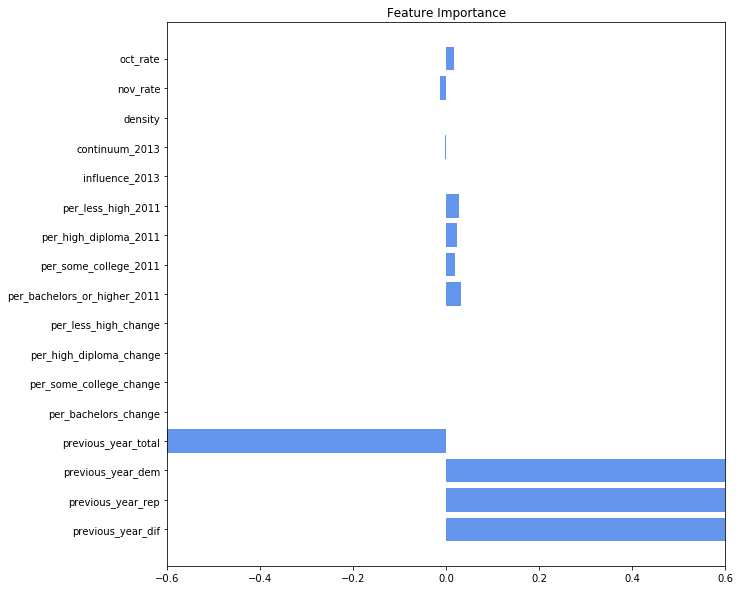

In [164]:
linear_model(df_2012, 'dem_vote_ratio')

R^2 on test 0.934298079734
mean squared error 0.0196765289347


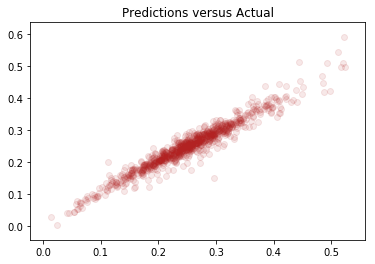

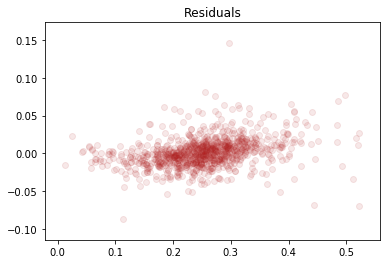

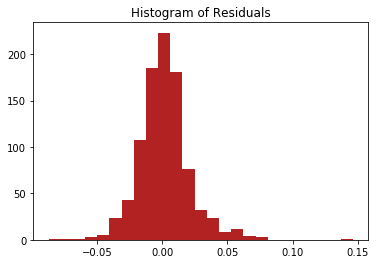

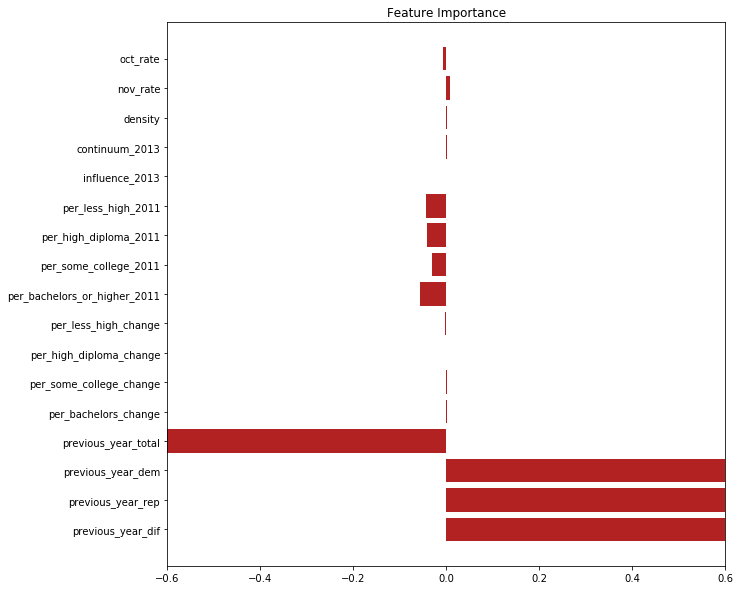

In [165]:
linear_model(df_2012, 'rep_vote_ratio')

R^2 on test 0.955269268982
mean squared error 0.0267307391428


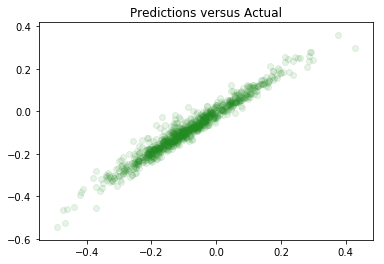

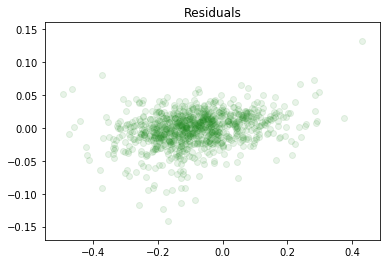

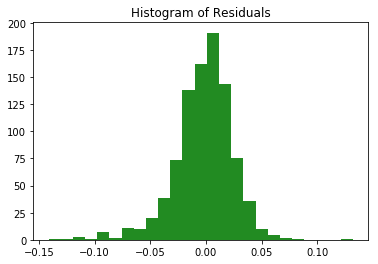

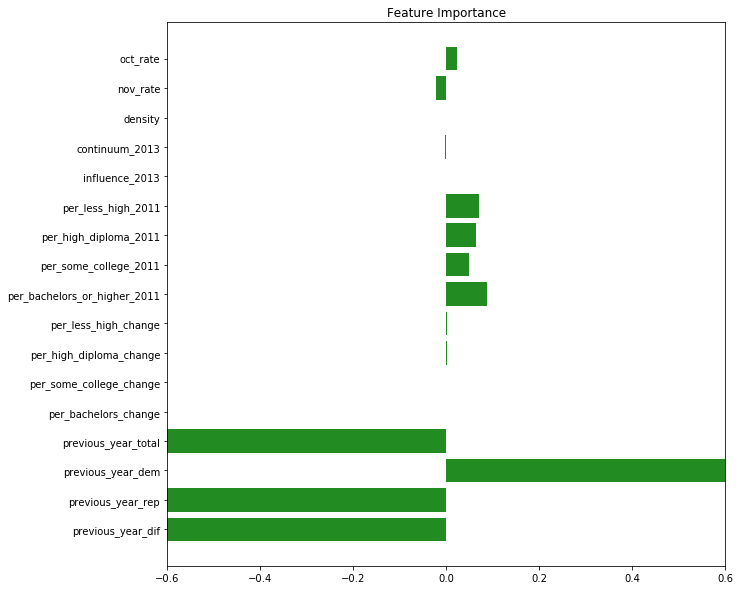

In [166]:
linear_model(df_2012, 'vote_diff')

# 2016

R^2 on test 0.883133827685
mean squared error 0.0269385853607


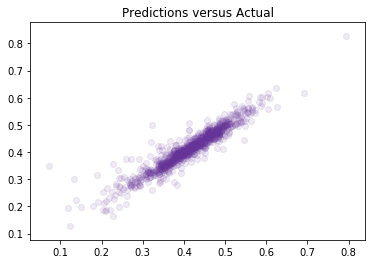

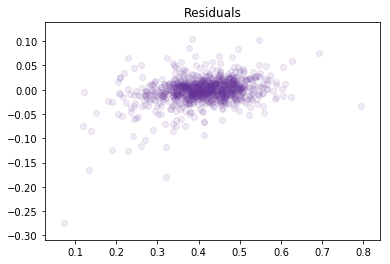

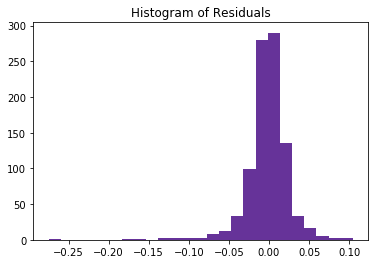

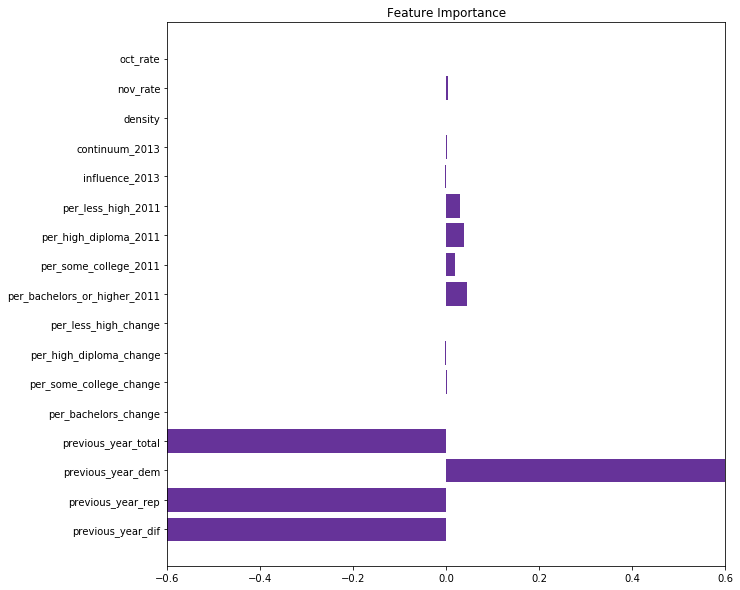

In [167]:
linear_model(df_2016, 'total_vote_ratio')

R^2 on test 0.949054821857
mean squared error 0.0157543966102


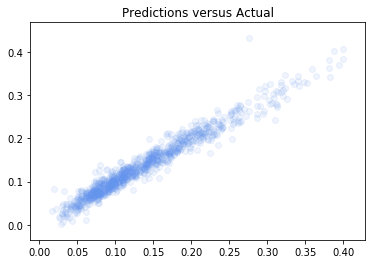

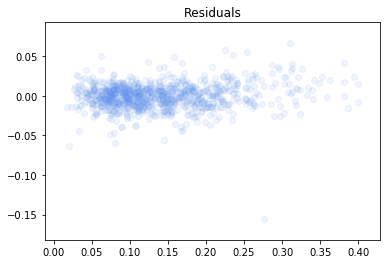

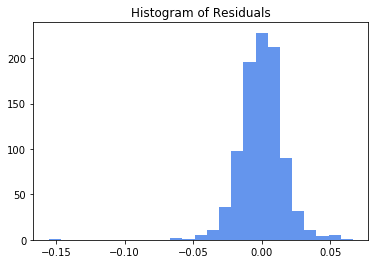

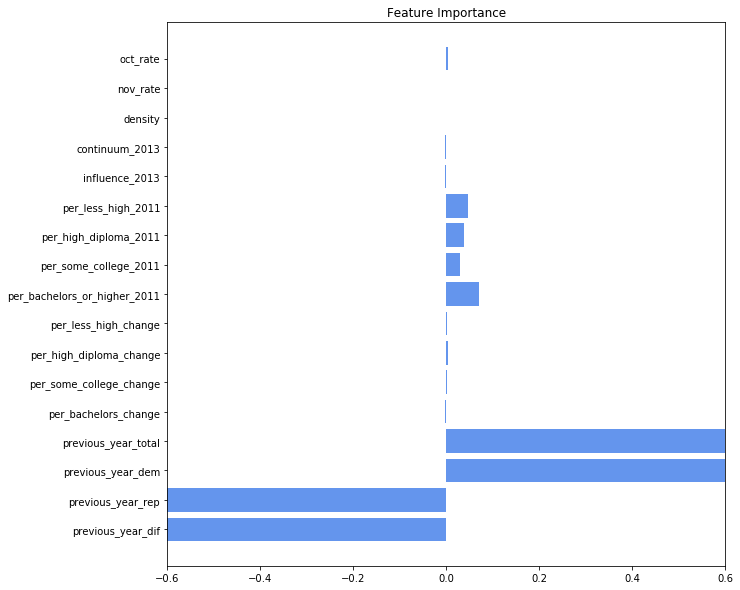

In [168]:
linear_model(df_2016, 'dem_vote_ratio')

R^2 on test 0.922177200177
mean squared error 0.0235643281124


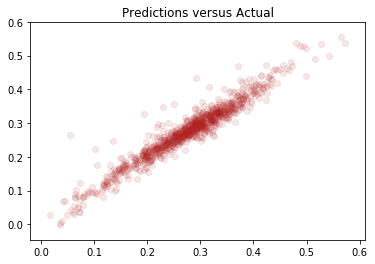

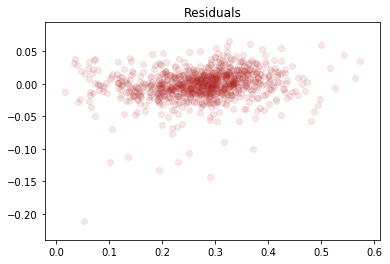

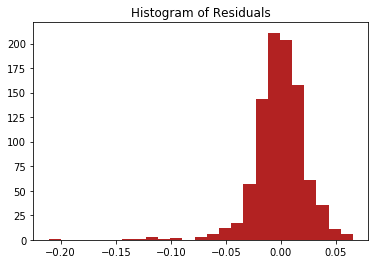

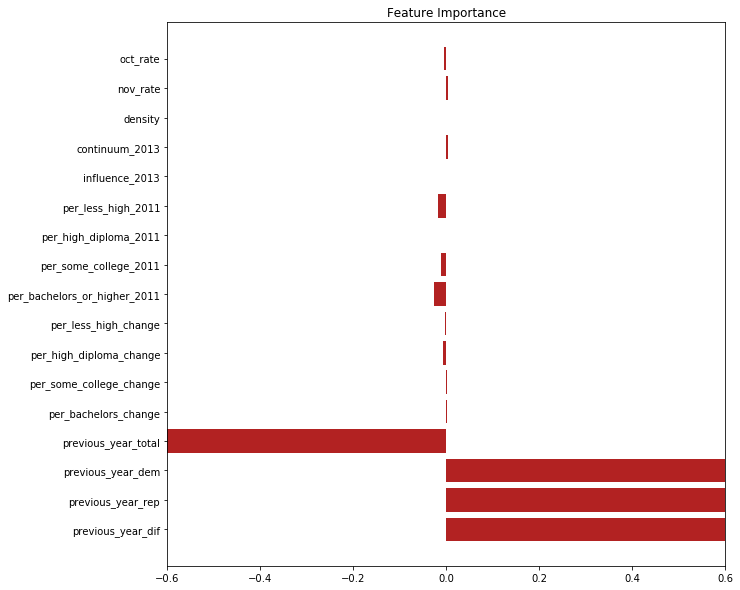

In [169]:
linear_model(df_2016, 'rep_vote_ratio')

R^2 on test 0.950604621199
mean squared error 0.0296876860035


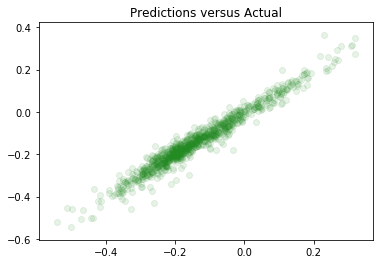

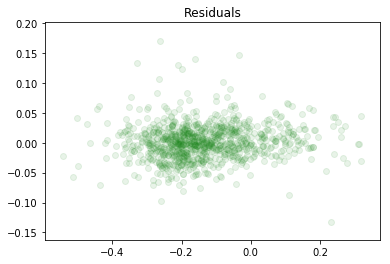

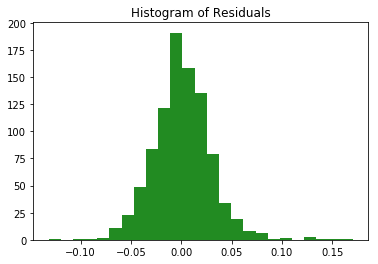

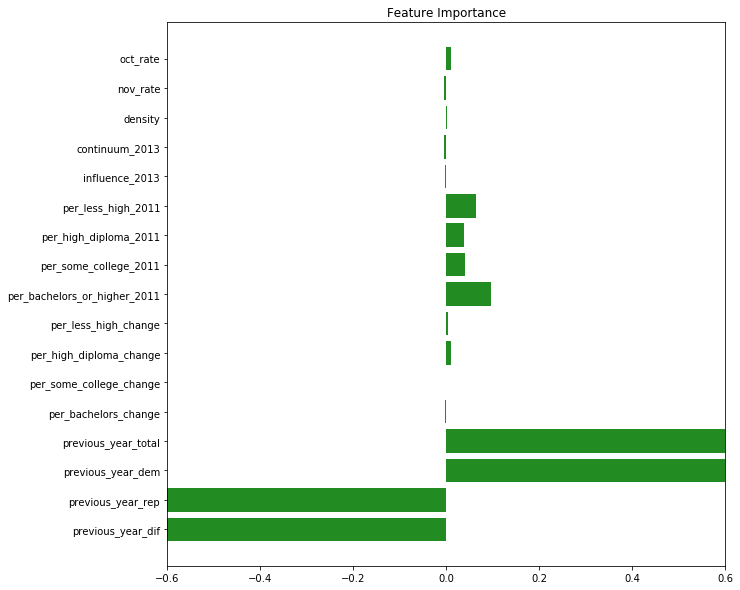

In [170]:
linear_model(df_2016, 'vote_diff')